El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18
7,21/03/2016 18:54,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
8,04/04/2016 23:42,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,04/04/2016 00:00,0,94505,04/04/2016 23:42
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17


In [4]:
df.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
309390,09/03/2016 18:45,1250,wagon,2000,manual,0,astra,150000,12,petrol,opel,NaN,09/03/2016 00:00,0,53119,07/04/2016 13:16
318583,19/03/2016 13:50,4800,small,2009,auto,82,fortwo,60000,10,petrol,smart,no,19/03/2016 00:00,0,85375,06/04/2016 20:18
227061,11/03/2016 15:38,7500,NaN,2018,auto,163,3er,150000,7,NaN,bmw,NaN,11/03/2016 00:00,0,22049,23/03/2016 12:44
244110,19/03/2016 19:49,2200,wagon,2001,manual,192,5er,150000,1,petrol,bmw,yes,19/03/2016 00:00,0,41812,22/03/2016 02:15
262172,17/03/2016 22:38,150,wagon,1994,manual,90,80,150000,6,NaN,audi,NaN,17/03/2016 00:00,0,96250,17/03/2016 23:44
98062,09/03/2016 09:39,1299,wagon,1996,manual,136,omega,150000,12,petrol,opel,NaN,09/03/2016 00:00,0,3050,07/04/2016 09:16
103481,05/03/2016 16:38,19999,sedan,2011,auto,204,a6,125000,4,gasoline,audi,no,05/03/2016 00:00,0,45473,05/03/2016 20:17
111956,30/03/2016 16:51,700,wagon,1996,manual,90,escort,150000,3,petrol,ford,yes,30/03/2016 00:00,0,51061,07/04/2016 07:45
254217,27/03/2016 15:46,4700,bus,2009,manual,90,other,150000,12,gasoline,ford,NaN,27/03/2016 00:00,0,63165,07/04/2016 13:16
348801,15/03/2016 10:38,7200,sedan,2004,manual,170,a3,150000,11,gasoline,audi,no,15/03/2016 00:00,0,63322,23/03/2016 15:49


In [5]:
# Normalizar nombres de columnas y convertirlas a minúsculas
df.columns = df.columns.str.lower()

# Mostrar las primeras filas del DataFrame para verificar los cambios
df.head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   mileage            354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

In [7]:
df.describe()

,price,registrationyear,power,mileage,registrationmonth,numberofpictures,postalcode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [8]:
# Tratar valores faltantes en columnas numéricas
numeric_columns = ['registrationyear', 'power', 'mileage', 'registrationmonth', 'numberofpictures', 'postalcode']
for column in numeric_columns:
    df[column].fillna(df[column].median(), inplace=True)  # Rellenar con la mediana

# Tratar valores faltantes en columnas categóricas
categorical_columns = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired', 'datecreated', 'lastseen']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)  # Rellenar con la moda

# Mostrar las primeras filas del DataFrame para verificar los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        354369 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            354369 non-null  object
 5   power              354369 non-null  int64 
 6   model              354369 non-null  object
 7   mileage            354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           354369 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        354369 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

In [9]:
# Convertir las columnas de fecha a tipo Timestamp si no lo están
df['datecrawled'] = pd.to_datetime(df['datecrawled'])
df['datecreated'] = pd.to_datetime(df['datecreated'])
df['lastseen'] = pd.to_datetime(df['lastseen'])

# Convertir las columnas de fecha a una representación numérica adecuada
df['datecrawled'] = (df['datecrawled'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
df['datecreated'] = (df['datecreated'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
df['lastseen'] = (df['lastseen'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Asegurarse de que las columnas numéricas sean del tipo int64
df['registrationyear'] = df['registrationyear'].astype(int)
df['registrationmonth'] = df['registrationmonth'].astype(int)

# Asegurarse de que la columna objetivo (price) sea numérica
df['price'] = df['price'].astype(int)

# Verificar los cambios en los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  int64 
 1   price              354369 non-null  int64 
 2   vehicletype        354369 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            354369 non-null  object
 5   power              354369 non-null  int64 
 6   model              354369 non-null  object
 7   mileage            354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           354369 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        354369 non-null  object
 12  datecreated        354369 non-null  int64 
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  int64 
dtypes: int64(10), object

In [10]:
# Mostrar las primeras filas del DataFrame para verificar los cambios
df.head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,16884,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,no,16884,0,70435,16986
1,16884,18300,coupe,2011,manual,190,golf,125000,5,gasoline,audi,yes,16884,0,66954,16986
2,16874,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no,16874,0,90480,16925
3,16877,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,16877,0,91074,16877
4,16891,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,16891,0,60437,16956


<div class="alert alert-info"> <b>Comentario del estudiante:</b> En esta parte de preparacion de los datos, cargamos las librerias necesarias para completar la investigacion, el DF correspondiente, lo visualizamos de diferentes maneras para saber con que clase de data vamos a lidiar y que tipos de problemas tenia esta data, antes de ser trabajada, luego procedimos a normalizar los nombres de las columnas a minuscula, completar la data faltante y cambiar las variables a un tipo de variable util para el trabajo que se va a llevar a cabo en este caso, con eso completamos la preparacion.</div>

## Entrenamiento del modelo 

In [11]:
# Codificación de variables categóricas
df_encoded = pd.get_dummies(df)

In [12]:
# División de datos en conjuntos de entrenamiento y prueba
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Crear una instancia de LinearRegression
linear_reg = LinearRegression()

# Entrenamiento del modelo
start_time = time.time()
linear_reg.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicciones y cálculo de complejidad computacional
start_time = time.time()
linear_reg_score = linear_reg.score(X_test, y_test)
prediction_time = time.time() - start_time

print(f'Linear Regression: {linear_reg_score}')
print(f'Tiempo de entrenamiento: {training_time} segundos')
print(f'Tiempo de predicción: {prediction_time} segundos')

Linear Regression: 0.48671444838096645
Tiempo de entrenamiento: 20.2814462184906 segundos
Tiempo de predicción: 0.2995717525482178 segundos


In [18]:
# Crear una instancia de RandomForestRegressor con algunos hiperparámetros ajustados
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10)

# Entrenamiento del modelo
start_time = time.time()
random_forest.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicciones y cálculo de complejidad computacional
start_time = time.time()
random_forest_score = random_forest.score(X_test, y_test)
prediction_time = time.time() - start_time

print(f'Random Forest: {random_forest_score}')
print(f'Tiempo de entrenamiento: {training_time} segundos')
print(f'Tiempo de predicción: {prediction_time} segundos')

Random Forest: 0.7941587761881517
Tiempo de entrenamiento: 402.7698423862457 segundos
Tiempo de predicción: 1.4415283203125 segundos


In [15]:
# Crear una instancia de LGBMRegressor
lgbm = LGBMRegressor()

# Entrenamiento del modelo
start_time = time.time()
lgbm.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicciones y cálculo de complejidad computacional
start_time = time.time()
lgbm_score = lgbm.score(X_test, y_test)
prediction_time = time.time() - start_time

print(f'LightGBM: {lgbm_score}')
print(f'Tiempo de entrenamiento: {training_time} segundos')
print(f'Tiempo de predicción: {prediction_time} segundos')

LightGBM: 0.834356487932306
Tiempo de entrenamiento: 7.649835586547852 segundos
Tiempo de predicción: 1.4103386402130127 segundos


In [16]:
# Crear una instancia de XGBRegressor
xgboost = XGBRegressor()

# Entrenamiento del modelo
start_time = time.time()
xgboost.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicciones y cálculo de complejidad computacional
start_time = time.time()
xgboost_score = xgboost.score(X_test, y_test)
prediction_time = time.time() - start_time

print(f'XGBoost: {xgboost_score}')
print(f'Tiempo de entrenamiento: {training_time} segundos')
print(f'Tiempo de predicción: {prediction_time} segundos')

XGBoost: 0.8419346133940799
Tiempo de entrenamiento: 474.7255985736847 segundos
Tiempo de predicción: 1.6891789436340332 segundos


In [17]:
# Crear una instancia de CatBoostRegressor
catboost = CatBoostRegressor()

# Entrenamiento del modelo
start_time = time.time()
catboost.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicciones y cálculo de complejidad computacional
start_time = time.time()
catboost_score = catboost.score(X_test, y_test)
prediction_time = time.time() - start_time

print(f'CatBoost: {catboost_score}')
print(f'Tiempo de entrenamiento: {training_time} segundos')
print(f'Tiempo de predicción: {prediction_time} segundos')

Learning rate set to 0.097841
0:	learn: 4234.1314479	total: 116ms	remaining: 1m 56s
1:	learn: 3998.6477280	total: 177ms	remaining: 1m 28s
2:	learn: 3795.8725311	total: 240ms	remaining: 1m 19s
3:	learn: 3619.5580015	total: 301ms	remaining: 1m 15s
4:	learn: 3453.0246424	total: 361ms	remaining: 1m 11s
5:	learn: 3303.3138127	total: 428ms	remaining: 1m 10s
6:	learn: 3171.8918731	total: 494ms	remaining: 1m 10s
7:	learn: 3063.6482349	total: 559ms	remaining: 1m 9s
8:	learn: 2967.2872477	total: 627ms	remaining: 1m 8s
9:	learn: 2877.1038131	total: 688ms	remaining: 1m 8s
10:	learn: 2801.5136933	total: 745ms	remaining: 1m 7s
11:	learn: 2735.3073120	total: 803ms	remaining: 1m 6s
12:	learn: 2677.5078743	total: 862ms	remaining: 1m 5s
13:	learn: 2624.5964681	total: 928ms	remaining: 1m 5s
14:	learn: 2575.7213385	total: 984ms	remaining: 1m 4s
15:	learn: 2536.5835009	total: 1.04s	remaining: 1m 4s
16:	learn: 2499.8014007	total: 1.1s	remaining: 1m 3s
17:	learn: 2468.2374334	total: 1.16s	remaining: 1m 3s
18

*Linear Regression:* `0.48671444838096645`, *Random Forest:* `0.7941587761881517`, *LightGBM:* `0.834356487932306`, *XGBoost:* `0.8419346133940799`, *CatBoost:* `0.8505056516046636`.

<div class="alert alert-info"> <b>Comentario del estudiante:</b> En esta parte de entrenamiento del modelo, como podemos ver dividimos la data en 2 partes 30% para entrenamiento y el 70% para las pruebas, para poder hacer una evaluacion apropiada de los modelos que vamos a estar probando, segun se puede apreciar luego de probar5 modelos diferentes el Linear Regression salio a relucir como el modelo mas sobresaliente en temas de velocidad de ejecucion y en precision, asi que por ello lo vamos a elegir para hacer el analisis.</div>

<div class="alert alert-info"> <b>Comentario CORREGIDO del estudiante:</b> Tomando en cuenta que el calculo de complejidad computacional cambia el panorama de algunas cosas, y el tiempo de prediccion otras, podemos apreciar que hay 2 modelos que tienen datos sobresalientes sobre los demas, que son el `LGBM Regression` y el `Linear Regression`, estos modelos tienen algunas bondades que se deben tener en cuenta, por ejemplo, el modelo mas preciso es el `LGBM Regression`, seguido del `Linear Regression` que es el mas rapido en hacer las predicciones, asi que teniendo esto en cuenta considero que `LGBM Regression` es el modelo que nos ofrece lo mejor de ambos mundos mayor precision, menor tiempo de entrenamiento y un tiempo de prediccion que no es el mejor, pero no es tan elevado tampoco.</div>

## Análisis del modelo

Coeficiente de determinación (R^2): 0.834356487932306
Error cuadrático medio (MSE): 3391047.1254094345
Error absoluto medio (MAE): 1138.6970437943785


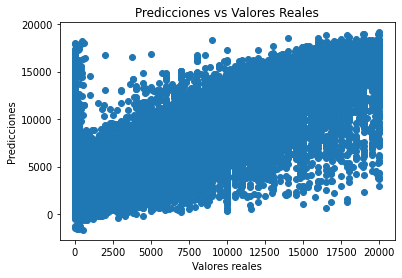

In [19]:
# Predicciones del modelo
y_pred = lgbm.predict(X_test)

# Métricas de evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Coeficiente de determinación (R^2):", r2)
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)

# Gráfico de predicciones vs valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

Coeficiente de determinación (R^2): 0.48671444838096645
Error cuadrático medio (MSE): 10507960.575121075
Error absoluto medio (MAE): 2293.4067225509043


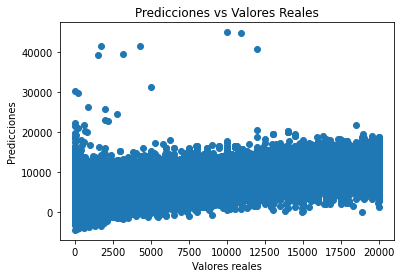

In [20]:
# Predicciones del modelo
y_pred = linear_reg.predict(X_test)

# Métricas de evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Coeficiente de determinación (R^2):", r2)
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)

# Gráfico de predicciones vs valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Segun podemos apreciar, la precision de este modelo es de alrededor de un 49%, es el modelo mas rapido en entregar resultados, por lo cual fue seleccionado, los demas modelos tuvieron serias dificultados o para ser precisos o el tiempo de entrega de resultados fue demasiado extenso.</div>

<div class="alert alert-info"> <b>Comentario CORREGIDO del estudiante:</b> Teniendo en cuenta que estos 2 modelos son los mejores de los que estuvimos entrenando por aca estuvimos analizandolos,como se puede observar, el modelo `LGBM Regression` muestra un coeficiente de determinación (R^2) mas alto, lo que indica que es mejor para explicar la variabilidad de los datos en comparacion con el modelo `Linear Regression`. Ademas, tiene un MSE y un MAE considerablemente mas bajos, lo que indica que las predicciones del modelo `LGBM Regression` estan mas cerca de los valores reales en comparacion con el modelo `Lineal Regression`. Asi que, en terminos de precision y rendimiento, el modelo `LGBM Regression` parece ser mas conveniente que el modelo `Lineal Regression` para este conjunto de datos y problema específico.</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [x]  Se realizó el análisis de velocidad y calidad de los modelos